### Exercises

#### Question 1

Alongside this notebook is a file `daily_quotes.csv` (the same one that we used for the Pandas exercises).

Using this data write a function that generates a composite of line charts (2 columns wide), that charts the closing price for each symbol in the data.

##### Solution 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# setting plotting defaults
mpl.style.use('seaborn-v0_8-darkgrid')
mpl.rcParams['figure.figsize'] = [11, 7]

In [3]:
# check out file
with open('daily_quotes.csv') as f:
    for _ in range(5):
        print(next(f).strip())    

﻿Symbol,Date, Close/Last, Volume, Open, High, Low
AAPL,2/12/21,135.37,60145130,134.35,135.53,133.6921
AMZN,2/12/21,3277.71,2335339,3250,3280.25,3233.31
GOOG,2/12/21,2104.11,855865,2090.25,2108.82,2083.13
MSFT,2/12/21,244.99,16561080,243.933,245.3,242.73


In [59]:
# function to plot 2x2 fig, 1 axes for each symbol
def sym_plot(filename, plot_size: tuple = (2, 2), figsize: tuple = (14, 9)):
    # access file on disk and converting to dataframe
    df = pd.read_csv(
        filename,
        header=0,
        names=['symbol', 'date', 'close', 'volume', 'open', 'high', 'low'],
        skipinitialspace=True,
        date_format='%m/%d/%y',
        parse_dates=['date'],
        index_col='date',
    )[['open', 'high', 'low', 'close', 'volume', 'symbol']]

    # create the plot
    fig, axes = plt.subplots(*plot_size, figsize=figsize)
    axes = axes.flatten()

    # loop through symbols and plot groph for each
    for i, sym in enumerate(df.symbol.unique()):
        if i >= len(axes): # stop if there are more symbols than axes
            break
        ax = axes[i] # get Axes object
        sym_df_close = df[df.loc[:, 'symbol'] == sym][['close']] # get 'close' Series dataset
        sym_idx = df.index[df.loc[:, 'symbol'] == sym] # get 'date' Index dataset

        # plot graph
        ax.plot(sym_idx.values, sym_df_close.values, label=sym)
        ax.set_title(f'\'{sym}\' STOCK PRICE')
        ax.set_xlabel('date')

        # show y_axis label on left-most axes in various conditions
        # depending on plot axes 'i' and `plot_size`
        if plot_size[-1] > 1:
            if i % 2 == 0:
                ax.set_ylabel('close value')
            if plot_size[-1] > 2:
                ax.set_ylabel('close value')
        else:
            ax.set_ylabel('close value')
    
    # hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout() # adjust spacing between subplots
    plt.show()

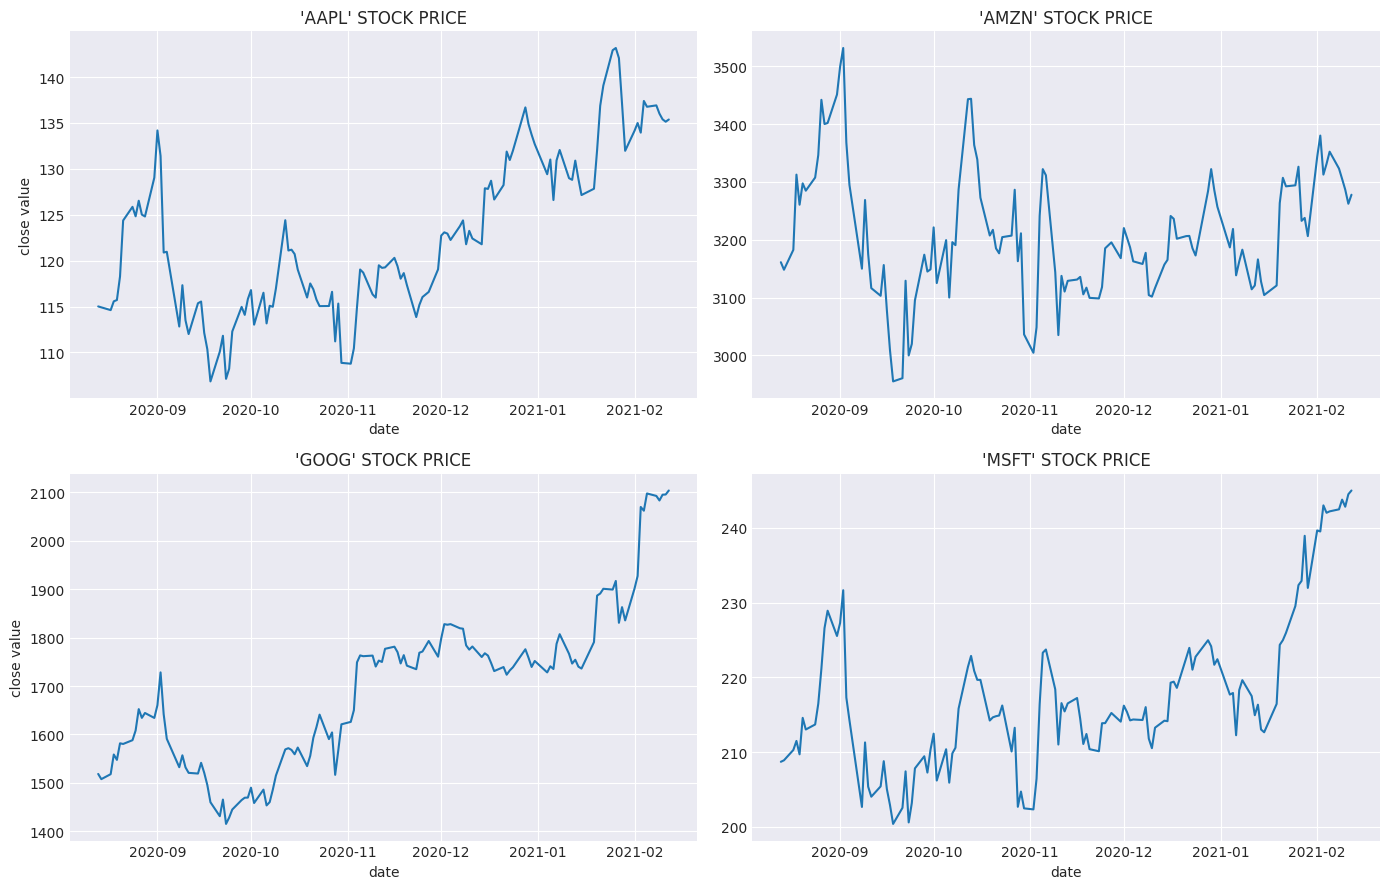

In [60]:
sym_plot('daily_quotes.csv')

### Question 2

Expand on your previous function to include an `n`-day moving average on each chart. (When you calculate the moving average, be careful with the order of the data in each subset of data).

##### Solution 2

In [57]:
# modify func to calculate and plot moving average for each symbol
def sym_plot_ma(filename, ma: 'moving average `n`', plot_size=(2, 2), figsize=(14, 9)):
    # access file on disk and converting to dataframe
    df = pd.read_csv(
        filename,
        header=0,
        names=['symbol', 'date', 'close', 'volume', 'open', 'high', 'low'],
        skipinitialspace=True,
        date_format='%m/%d/%y',
        parse_dates=['date'],
        index_col='date',
    )[['open', 'high', 'low', 'close', 'volume', 'symbol']]

    # create the plot
    fig, axes = plt.subplots(*plot_size, figsize=figsize)
    axes = axes.flatten()

    # gotta look out for the order of the 'date' Index dataset considering that:
    # in the original dataset, the latest date comes first and the oldest date comes last
    # when calculating moving average, we have to start from the oldest date
    # therefore, I have to reverse the row to start from the oldest 'date' Index and 'close' Series
    df_reversed = df.iloc[::-1] # reverse the dataframe

    # loop through symbols and plot groph for each
    for i, sym in enumerate(df.symbol.unique()):
        if i >= len(axes): # stop if there are more symbols than axes
            break
        ax = axes[i] # get Axes object
        sym_df_close = df[df.loc[:, 'symbol'] == sym][['close']] # get 'close' Series dataset
        sym_idx = df.index[df.loc[:, 'symbol'] == sym] # get 'date' Index dataset

        # calculate moving average
        sym_df_rev_close = df_reversed[df_reversed.loc[:, 'symbol'] == sym][['close']] # get reversed 'close' Series dataset
        sym_idx_rev = df_reversed.index[df_reversed.loc[:, 'symbol'] == sym] # get reversed 'date' Index dataset
        ma_df = sym_df_rev_close.rolling(window=ma).mean()

        # plot graph
        ax.plot(sym_idx.values, sym_df_close.values, label=sym)
        # plot moving average
        ax.plot(sym_idx_rev.values, ma_df.values, label=f'ma_{ma}')
        
        ax.set_title(f'\'{sym}\' STOCK PRICE')
        ax.set_xlabel('date')
        ax.legend() # show legend

        # show y_axis label on left-most axes in various conditions
        # depending on plot axes 'i' and `plot_size`
        if plot_size[-1] > 1:
            if i % 2 == 0:
                ax.set_ylabel('close value')
            if plot_size[-1] > 2:
                ax.set_ylabel('close value')
        else:
            ax.set_ylabel('close value')
    
    # hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout() # adjust spacing between subplots
    plt.show()

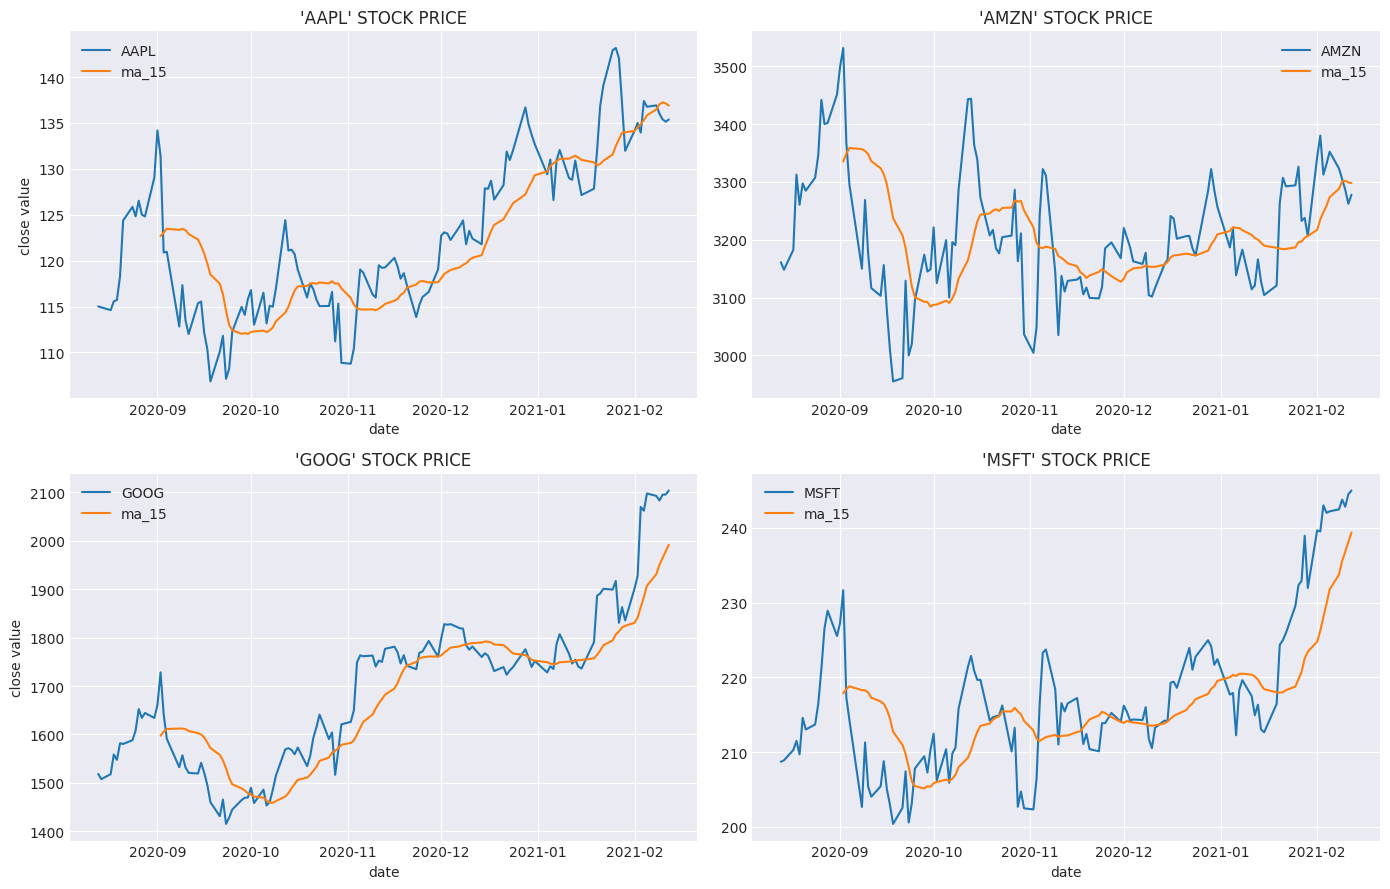

In [58]:
sym_plot_ma('daily_quotes.csv', 15)

#### Question 3

Using the previous charts, add horizontal lines for the 25th, 50th and 75th percentiles of the close price (calculated over the entire time period).

##### Solution 3

In [55]:
# modify func to calculate 25th, 50th, and 75th percentile of close value for each symbol
# and plot horizontal lines for each plot axes
def sym_plot_perc(filename, ma: 'moving average `n`', plot_size=(2, 2), figsize=(14, 9), calc_percentile=True):
    # access file on disk and converting to dataframe
    df = pd.read_csv(
        filename,
        header=0,
        names=['symbol', 'date', 'close', 'volume', 'open', 'high', 'low'],
        skipinitialspace=True,
        date_format='%m/%d/%y',
        parse_dates=['date'],
        index_col='date',
    )[['open', 'high', 'low', 'close', 'volume', 'symbol']]

    # create the plot
    fig, axes = plt.subplots(*plot_size, figsize=figsize)
    axes = axes.flatten()

    # reverse the dataframe to calculate accurate moving average `ma_df`
    df_reversed = df.iloc[::-1]

    # loop through symbols and plot groph for each
    for i, sym in enumerate(df.symbol.unique()):
        if i >= len(axes): # stop if there are more symbols than axes
            break
        ax = axes[i] # get Axes object
        sym_df_close = df[df.loc[:, 'symbol'] == sym][['close']] # get 'close' Series dataset
        sym_idx = df.index[df.loc[:, 'symbol'] == sym] # get 'date' Index dataset

        # calculate moving average
        sym_df_rev_close = df_reversed[df_reversed.loc[:, 'symbol'] == sym][['close']] # get reversed 'close' Series dataset
        sym_idx_rev = df_reversed.index[df_reversed.loc[:, 'symbol'] == sym] # get reversed 'date' Index dataset
        ma_df = sym_df_rev_close.rolling(window=ma).mean()

        # plot graph
        ax.plot(sym_idx.values, sym_df_close.values, label=sym)
        # plot moving average
        ax.plot(sym_idx_rev.values, ma_df.values, label=f'ma_{ma}')

        if calc_percentile:
            # calculate percentiles
            percentiles = [np.percentile(sym_df_close.values, perc) for perc in (25, 50, 75)]
            ax.axhline(percentiles[0], linestyle=':', color='green', xmin=.25, xmax=.75, label='25th percentile')
            ax.axhline(percentiles[1], linestyle='--', color='red', label='50th percentile')
            ax.axhline(percentiles[2], linestyle=':', color='purple', xmin=.25, xmax=.75, label='75th percentile')
        
        ax.set_title(f'\'{sym}\' STOCK PRICE')
        ax.set_xlabel('date')
        ax.legend() # show legend

        # show y_axis label on left-most axes in various conditions
        # depending on plot axes 'i' and `plot_size`
        if plot_size[-1] > 1:
            if i % 2 == 0:
                ax.set_ylabel('close value')
            if plot_size[-1] > 2:
                ax.set_ylabel('close value')
        else:
            ax.set_ylabel('close value')
    
    # hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout() # adjust spacing between subplots
    plt.show()

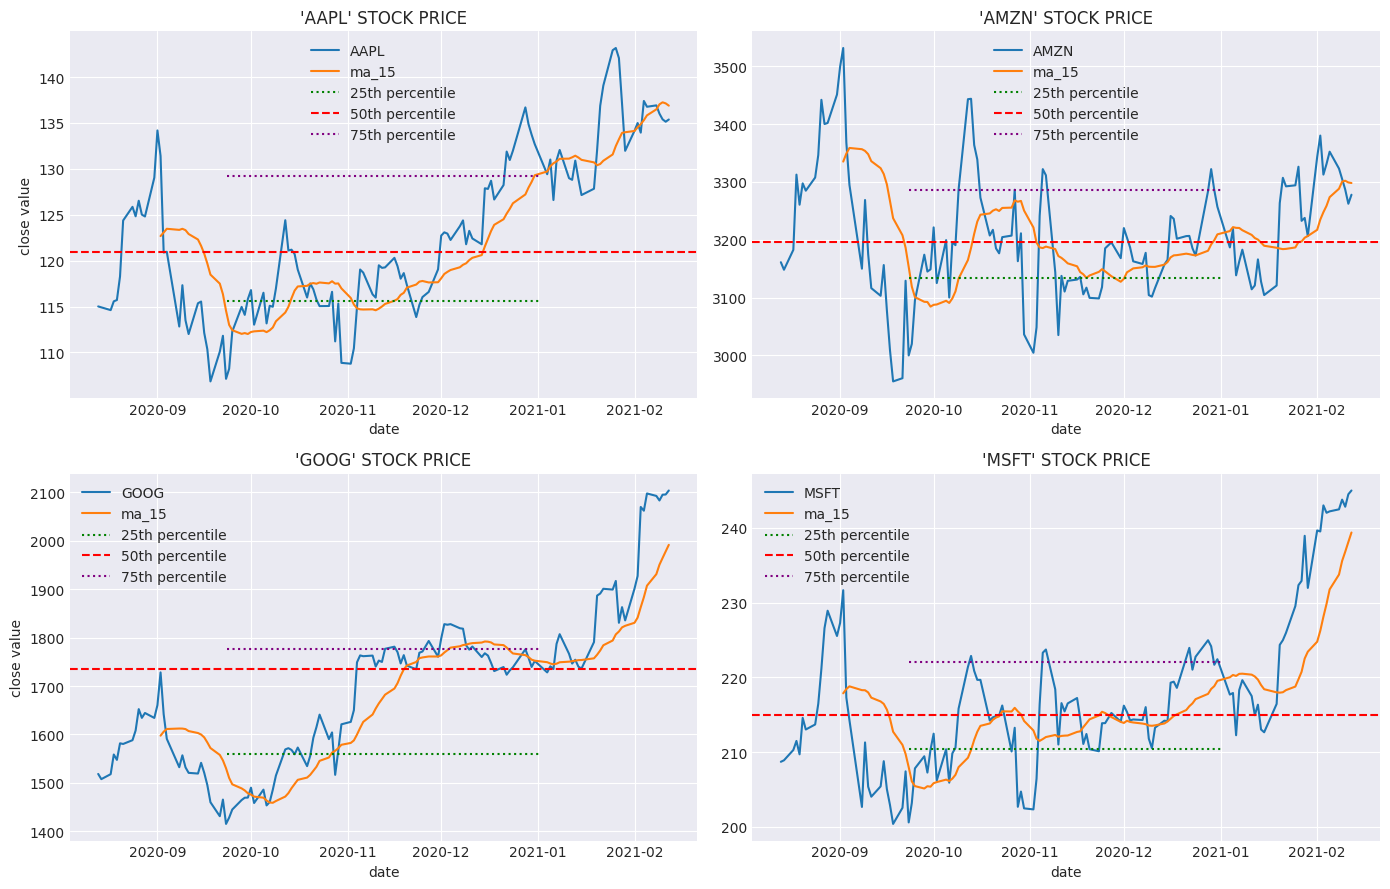

In [56]:
sym_plot_perc('daily_quotes.csv', 15, calc_percentile=True)